# Week 3: matplotlib - Data visualisation in Python

This lecture introduces a common visualisation tool in Python: Matplotlib

In this lecture, we will also discuss the way to present your modelling results and understand the data

## 1. Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

## 2. matplotlib


The main matplotlib interface is object-oriented. The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

### 2.1 matplotlib fundamentals

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

#then we import the matplotlib libraries
import matplotlib
import matplotlib.pyplot as plt


Here we use `Pandas`, the library that we learnt last week, and also `Numpy`, another very popular data analytic package in Python

In [3]:
import pandas as pd
import numpy as np

Let's load our `NZ_cars.csv` data in the Data folder, with index column is "OBJECTID"

In [5]:
df_cars = pd.read_csv("NZ_cars.csv", index_col="OBJECTID")
df_cars.fillna(0)
df_cars.head()

,BASIC_COLOUR,BODY_TYPE,CC_RATING,FIRST_NZ_REGISTRATION_YEAR,FIRST_NZ_REGISTRATION_MONTH,GROSS_VEHICLE_MASS,IMPORT_STATUS,INDUSTRY_CLASS,MAKE,MODEL,...,NZ_ASSEMBLED,ORIGINAL_COUNTRY,POWER_RATING,PREVIOUS_COUNTRY,SUBMODEL,TLA,TRANSMISSION_TYPE,VEHICLE_TYPE,VEHICLE_USAGE,VEHICLE_YEAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,
3001,WHITE,SALOON,1971,1979,5,0,NEW,PRIVATE,PEUGEOT,504,...,UNKNOWN,NOT KNOWN,0,NONE,NaN,AUCKLAND,NaN,PASSENGER CAR/VAN,PRIVATE PASSENGER,1979
3002,GOLD,HATCHBACK,1769,2005,5,1245,NEW,PRIVATE,NISSAN,PULSAR,...,IMPORTED BUILT-UP,UNITED KINGDOM,92,NONE,1.8 HATCH AUTO,AUCKLAND,5-GEAR AUTO,PASSENGER CAR/VAN,PRIVATE PASSENGER,2005
3003,RED,SALOON,5665,2005,9,2129,NEW,PRIVATE,HOLDEN,COMMODORE,...,IMPORTED BUILT-UP,AUSTRALIA,245,NONE,S V8 AUTO,AUCKLAND,4-GEAR AUTO,PASSENGER CAR/VAN,PRIVATE PASSENGER,2005
3004,BLUE,HATCHBACK,1796,2003,10,1690,NEW,PRIVATE,HOLDEN,ASTRA,...,IMPORTED BUILT-UP,GERMANY,85,NONE,CD HATCH 1.8L AUTO,AUCKLAND,4-GEAR AUTO,PASSENGER CAR/VAN,PRIVATE PASSENGER,2003
3005,SILVER,HATCHBACK,1796,2003,6,1640,NEW,PRIVATE,HOLDEN,ASTRA,...,IMPORTED BUILT-UP,GERMANY,85,NONE,CITY HATCH 1.8L MAN,AUCKLAND,5-GEAR MANUAL,PASSENGER CAR/VAN,PRIVATE PASSENGER,2003


`plot` is the main plotting function in matplotlib, if we use '.' then it's a scatterplot, before it we can set the color, e.g. `r` for Red, `b` for blue

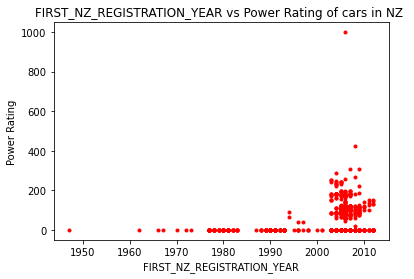

In [8]:
#define a figure first
fig = plt.figure()
#plt is the package name for matplotlib
plt.plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars['POWER_RATING'], 'r.')

plt.xlabel('FIRST_NZ_REGISTRATION_YEAR')
plt.ylabel('Power Rating')
plt.title('FIRST_NZ_REGISTRATION_YEAR vs Power Rating of cars in NZ ');
plt.show()

Now as we can see there are quite a bit of data where Power rating equals zero, which perhaps because we have no information on the Power rating of the car, let's use what we learnt in the previous week to filter these data out and plot again

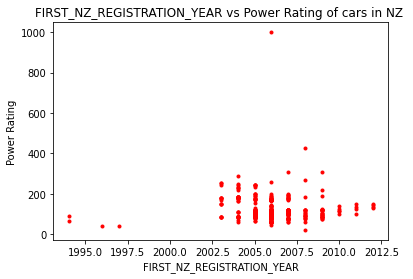

In [12]:
df_cars = df_cars[df_cars['POWER_RATING']>0]

fig = plt.figure()

plt.plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars['POWER_RATING'], 'r.')

plt.xlabel('FIRST_NZ_REGISTRATION_YEAR')
plt.ylabel('Power Rating')
plt.title('FIRST_NZ_REGISTRATION_YEAR vs Power Rating of cars in NZ ');
plt.show()


Much better now, what can you see in the Figure above? 

The x-axis looks odd now, let's refine the axes to see better

Let's look at another way of coding where we deal with directly with axes instead

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed

### Using axes instead of `.plt` directly

In Matplotlib, it's generally beneficial to define `axes` to define elements of the plot more precisely. Each axes can be defined as a plot (e.g. a sub-figure) within the whole figure that you plan to visualise

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes


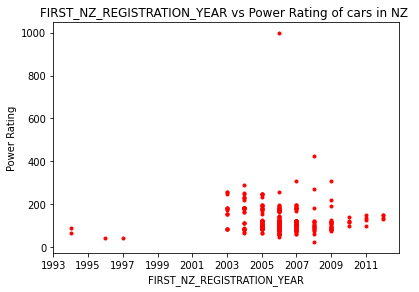

In [22]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # add_axes deals with the relative position of the axes in our screen

axes.plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars['POWER_RATING'], 'r.')
axes.set_xlabel('FIRST_NZ_REGISTRATION_YEAR')
axes.set_xticks(range(1993,2013,2))
axes.set_ylabel('Power Rating')
axes.set_title('FIRST_NZ_REGISTRATION_YEAR vs Power Rating of cars in NZ ');
plt.show()



### 2.2 Multiple axes and subplots

And we can easily add more than one axis to the figure:

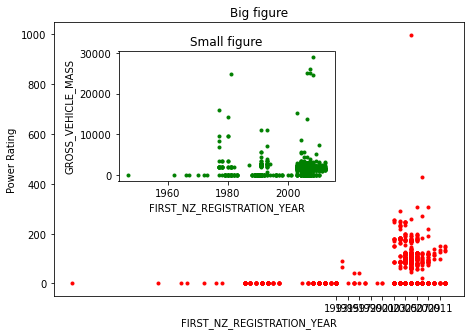

In [10]:
fig = plt.figure()
#define two specific axes 
axes1 = fig.add_axes([0.1, 0.1, 0.95, 0.95]) # main axes
axes2 = fig.add_axes([0.25, 0.5, 0.5, 0.45]) # inset axes

# main figure
axes1.plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars['POWER_RATING'], 'r.')
axes1.set_xlabel('FIRST_NZ_REGISTRATION_YEAR')
axes1.set_ylabel('Power Rating')
axes1.set_xticks(range(1993,2013,2))
axes1.set_title('Big figure')

# insert
axes2.plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars['GROSS_VEHICLE_MASS'], 'g.')
axes2.set_xlabel('FIRST_NZ_REGISTRATION_YEAR')

axes2.set_ylabel('GROSS_VEHICLE_MASS')
axes2.set_title('Small figure');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

NameError: name 'x' is not defined

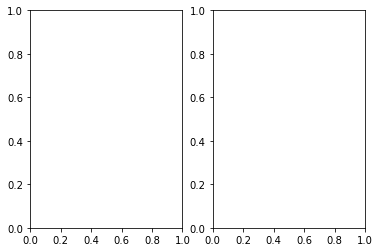

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

Text(0, 0.5, 'GROSS_VEHICLE_MASS')

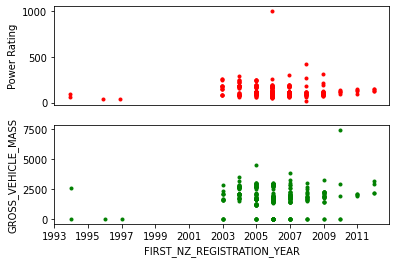

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars['POWER_RATING'], 'r.')
axes[0].set_xlabel('FIRST_NZ_REGISTRATION_YEAR')
axes[0].set_ylabel('Power Rating')
axes[0].get_xaxis().set_visible(False)

# 2nd plot
axes[1].plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars['GROSS_VEHICLE_MASS'], 'g.')
axes[1].set_xlabel('FIRST_NZ_REGISTRATION_YEAR')
axes[1].set_xticks(range(1993,2013,2))
axes[1].set_ylabel('GROSS_VEHICLE_MASS')


As we can see, `axes` is a list, that we can potentially loop over to plot more things on the same screen

In this example we plot exactly the samething but 

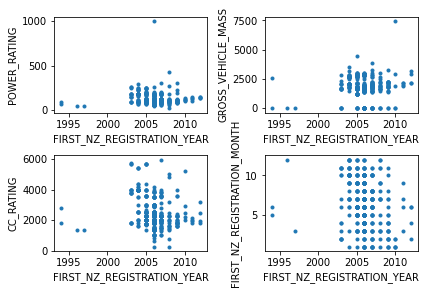

In [53]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

plot_list = ['POWER_RATING','GROSS_VEHICLE_MASS', 'CC_RATING','FIRST_NZ_REGISTRATION_MONTH']

for i in range(0,4):
    axes[i].plot(df_cars['FIRST_NZ_REGISTRATION_YEAR'], df_cars[plot_list[i]], '.')
    axes[i].set_xlabel('FIRST_NZ_REGISTRATION_YEAR')
    axes[i].set_ylabel(plot_list[i])
    
fig.tight_layout()

### 2.3 Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [55]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

### 2.4 Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [59]:
fig.savefig("test_figure.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [60]:
fig.savefig("test_figure.png", dpi=200)

You can find the test_figure.png file in the same folder with this notebook

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

### 2.5 Legends

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with legends.

Let's start with an example of some math functions

$$ y = x^2 $$
and

$$ y = x^3 $$

We can use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using `legend` method without arguments to add the legend to the figure: 

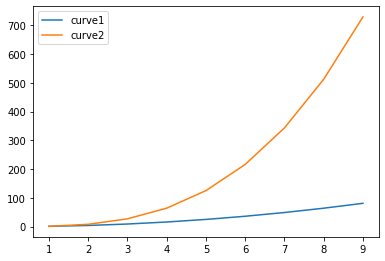

In [68]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # add_axes deals with the relative position of the axes in our screen

x= np.arange(1,10)
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

If curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

Example for legend location

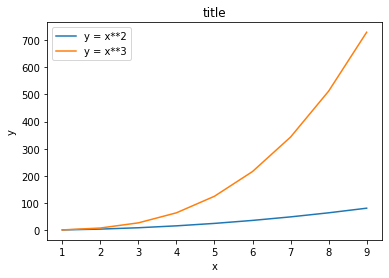

In [73]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

**Exercise**

Re-Plot the 4 figures that we plotted with NZ cars and add legends in those figures

### 2.6 Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication (look at those equations in the legend, e.g. `y= x**2`, they look odd!)

First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

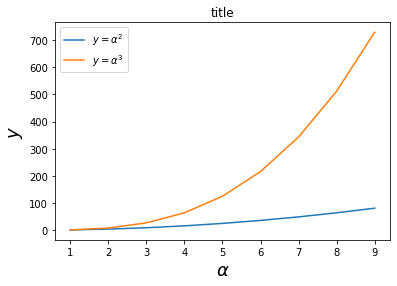

In [76]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [79]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

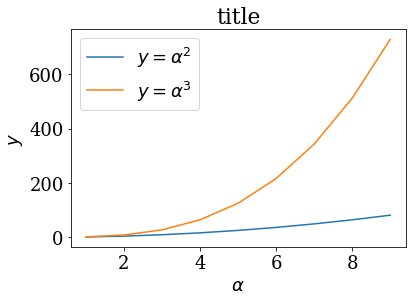

In [80]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the STIX fonts: We can change the overal font in Matplotlib using `matplotlib.rcParams.update`

In [81]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

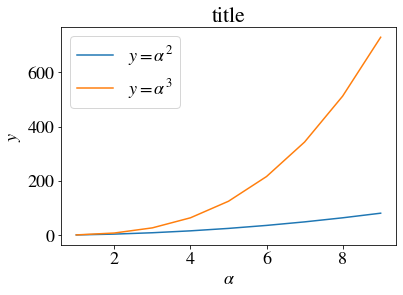

In [82]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

Or, alternatively, we can request that matplotlib uses LaTeX to render the text elements in the figure:

In [83]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

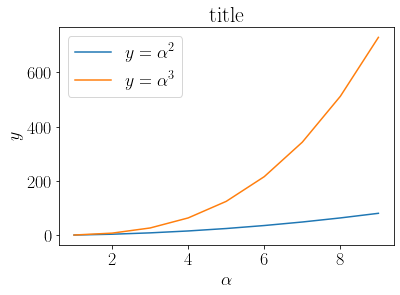

In [84]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [85]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### 2.7 Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

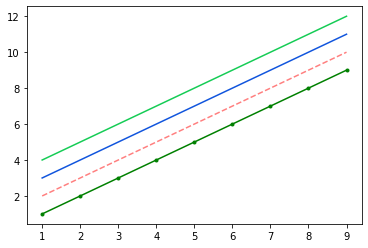

In [7]:
x= np.arange(1,10)

fig, ax = plt.subplots()

ax.plot(x, x, "g.-") # green line with dots
ax.plot(x, x+1, "r--", alpha=0.5) # half-transparant red dashed line
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### Detailed line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

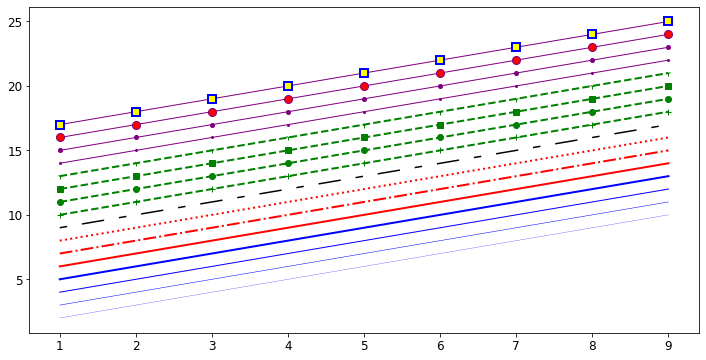

In [88]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### 2.8 Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges. 

Also here we will try to plot multiple lines using a single `plot` function.

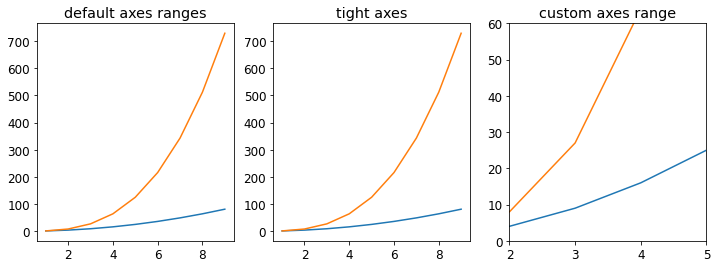

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Logarithmic scale

You perhaps have heard about the use of logarithmic scale to show the number of Covid-19 cases, e.g. (https://coronavirus.jhu.edu/data/cumulative-cases). 

In Matplotlib, it is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

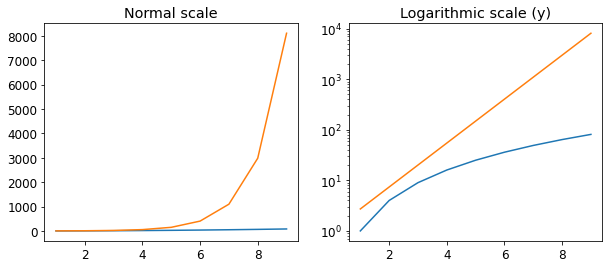

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### 2.9 Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

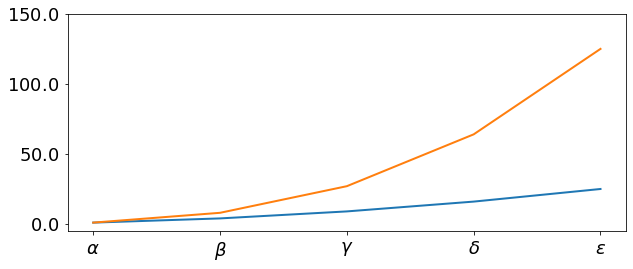

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
x2=np.arange(1,6)

ax.plot(x2, x2**2, x2, x2**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

### 2.10 Axis number and axis label spacing

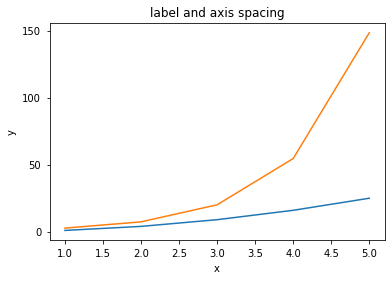

In [12]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x2, x2**2, x2, np.exp(x2))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [99]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

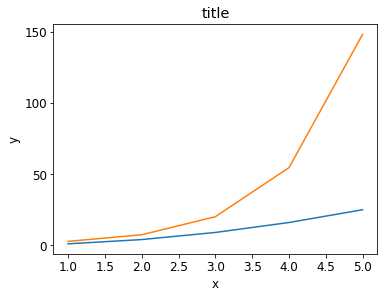

In [101]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x2, x2**2, x2, np.exp(x2))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### 2.11 Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

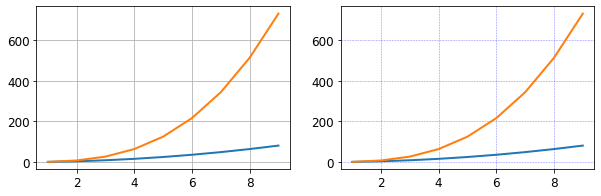

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### 2.12 Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

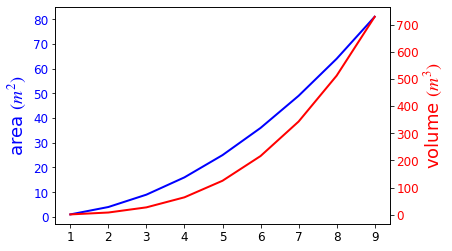

In [104]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### 2.14 Axes where x and y is zero

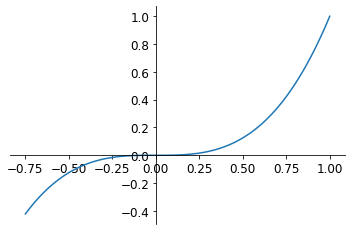

In [105]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### 2.15 Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. 




Some of the more useful ones are show below:

In [106]:
n = np.array([0,1,2,3,4,5])

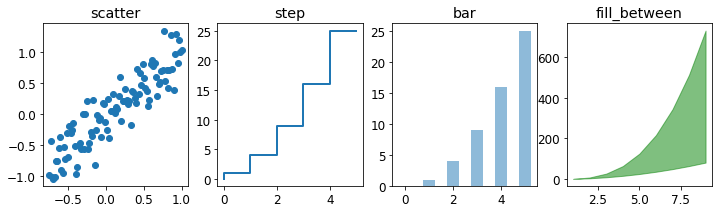

In [107]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

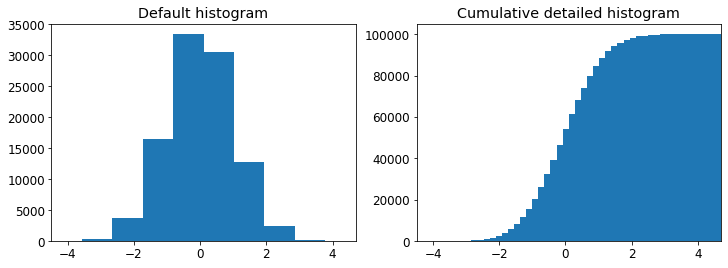

In [109]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### 2.16 Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

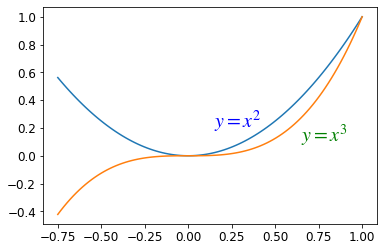

In [110]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### 2.17 Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

We had examples using subplot before. This is the most common way to plot multiple figures on the page

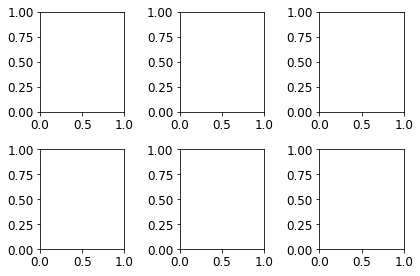

In [111]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

A more advanced (and more beautiful) way of ploting is to use `subplot2grid`, which gives us a lot more freedom of how to plot things

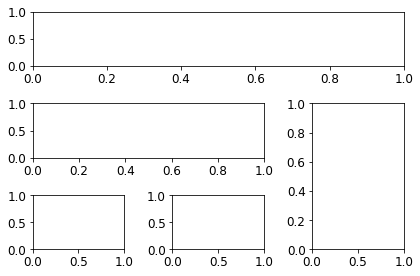

In [113]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

`gridspec` is more flexible than `subplot` and less than `subplot2grid`

In [114]:
import matplotlib.gridspec as gridspec

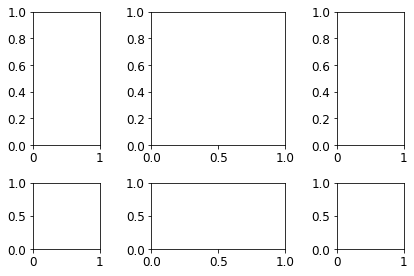

In [115]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

## 3. Exercise

Open `N03b - Matplotlib Exercise` and try to finish the questions there. It's challenging, I know, as you'll plot on real data, but I'd like you to try anyway. We can help

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
